In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

In [2]:
ts_df = pd.read_csv('tute1.csv')

In [13]:
ts_df.head()

,Date,Sales,AdBudget,GDP,Month,Year,quarter
0,Mar-81,1020.2,659.2,251.8,Mar,81,1
1,Jun-81,889.2,589.0,290.9,Jun,81,2
2,Sep-81,795.0,512.5,290.8,Sep,81,3
3,Dec-81,1003.9,614.1,292.4,Dec,81,4
4,Mar-82,1057.7,647.2,279.1,Mar,82,1


In [4]:
ts_df.columns = ['Date', 'Sales', 'AdBudget', 'GDP']

In [5]:
ts_df['Month'] = ts_df['Date'].apply(lambda x: x[0:3])

In [6]:
ts_df['Year'] = ts_df['Date'].apply(lambda x: int(x[-2:]))

In [7]:
months = list(ts_df.Month.unique())
quarter_map = {}
for idx, m in enumerate(months):
    quarter_map[m] = idx+1
    

In [8]:
ts_df['quarter'] = ts_df['Month'].apply(lambda x: quarter_map[x])

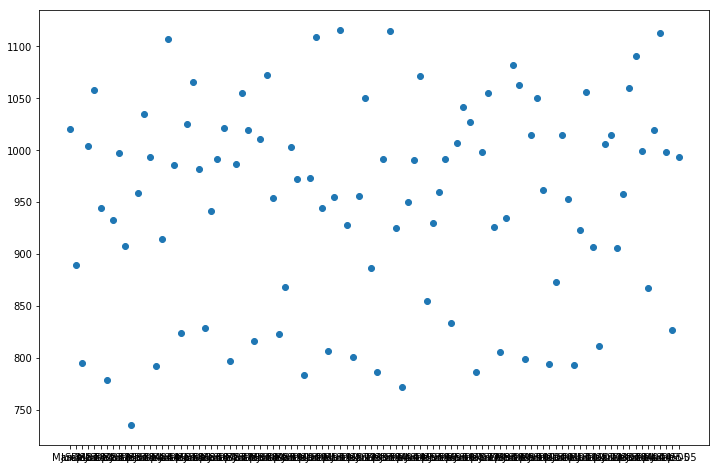

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(ts_df['Date'], ts_df['Sales'])

In [54]:
sales_change = ts_df['Sales'].pct_change()
sales_change = sales_change.dropna()

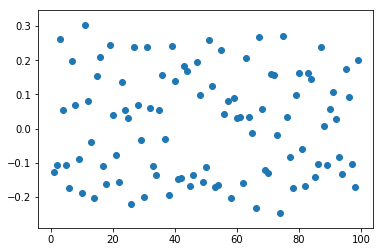

In [11]:
plt.scatter(sales_change.index, sales_change)

In [12]:
autocorrelation = sales_change.autocorr()
print("The autocorrelation of quarterly sales is %4.2f" %(autocorrelation))

The autocorrelation of quarterly sales is -0.16


In [14]:
sales_diff = ts_df['Sales'].diff()

In [16]:
sales_diff = sales_diff.dropna()

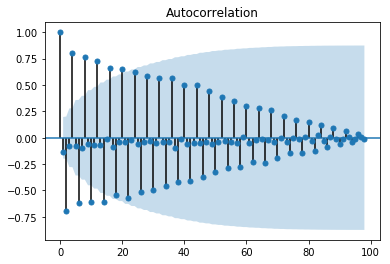

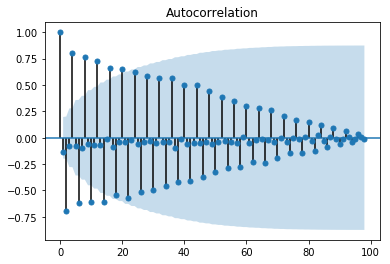

In [18]:
plot_acf(sales_diff)

In [26]:
model = ARMA(ts_df['Sales'].values, order=(1,0))

In [27]:
res = model.fit()

In [28]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 0)   Log Likelihood                -600.145
Method:                       css-mle   S.D. of innovations             97.759
Date:                Wed, 06 Feb 2019   AIC                           1206.290
Time:                        14:28:33   BIC                           1214.105
Sample:                             0   HQIC                          1209.453
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        948.7397      9.800     96.806      0.000     929.531     967.948
ar.L1.y        0.0025      0.100      0.025      0.980      -0.193       0.198
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          407.3794           +0.0000j          407.3794            0.0000
-----------------------------------------------------------------------------
"""

In [30]:
res.params

array([9.48739675e+02, 2.45471404e-03])

In [36]:
ts_df['Sales'].head()

0    1020.2
1     889.2
2     795.0
3    1003.9
4    1057.7
Name: Sales, dtype: float64

In [39]:
res.bic

1214.1050814819994

In [42]:
BIC = np.zeros(9)
for p in range(9):
    mod = ARMA(ts_df['Sales'].values, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic

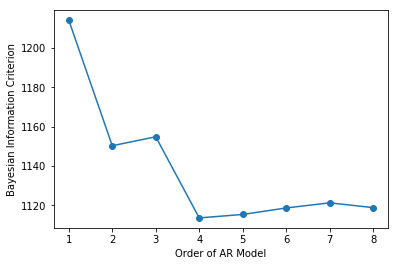

In [43]:
plt.plot(range(1,9), BIC[1:9], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

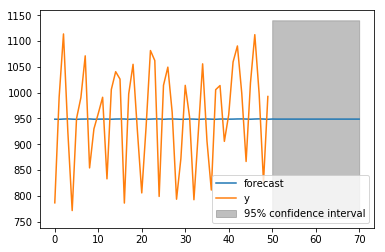

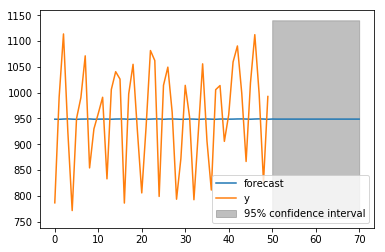

In [33]:
res.plot_predict(start=50, end=120)

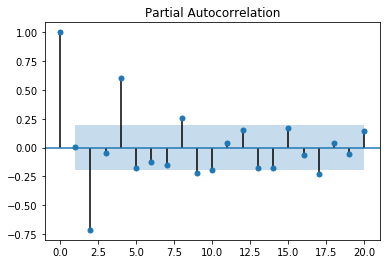

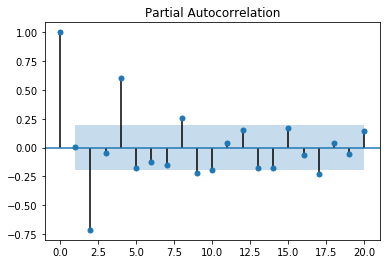

In [38]:
plot_pacf(ts_df['Sales'], lags=20)

In [45]:
ma_model = ARMA(ts_df['Sales'].values, order=(0,1))

In [46]:
results2 = ma_model.fit()

In [47]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(0, 1)   Log Likelihood                -598.485
Method:                       css-mle   S.D. of innovations             96.069
Date:                Thu, 07 Feb 2019   AIC                           1202.970
Time:                        12:31:19   BIC                           1210.785
Sample:                             0   HQIC                          1206.133
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        949.3707     13.350     71.112      0.000     923.205     975.537
ma.L1.y        0.3934      0.104      3.790      0.000       0.190       0.597
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.5416           +0.0000j            2.5416            0.5000
-----------------------------------------------------------------------------
"""

In [49]:
results2.params

array([9.49370742e+02, 3.93447415e-01])

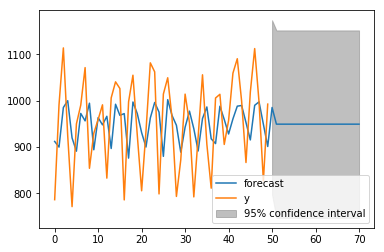

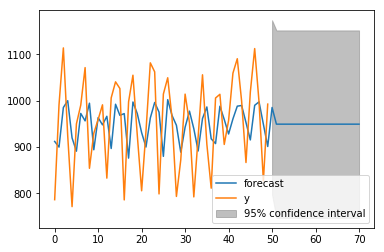

In [50]:
results2.plot_predict(start=50, end=120)

In [55]:
model_pct = ARMA(sales_change, order=(0,1))

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [56]:
result_pct = model_pct.fit()

In [58]:
result_pct.params

const          0.011992
ma.L1.Sales   -0.999987
dtype: float64

In [59]:
ma = [0.8**i for i in range(30)]
ar = np.array([1])